Chapter 16

# 区间估计：总体方差已知，均值估计
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过绘制标准正态分布的概率密度函数 (PDF) 来说明单侧和双侧假设检验的临界区域，并计算在置信水平 $\alpha = 0.05$ 下的临界值。

### 1. 标准正态分布的定义
代码首先生成了标准正态分布 $N(0,1)$ 的 PDF，其表达式为：
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$
在区间 $[-4, 4]$ 中绘制出 $f(x)$ 的分布曲线。

### 2. 双侧检验
对于双侧检验，代码计算置信水平 $\alpha = 0.05$ 时的临界值 $z_{\alpha/2}$，即 $z_{0.025}$，该值为：
$$
z_{\alpha/2} = \text{stats.norm.ppf}(1 - \alpha/2)
$$
在分布的左右两端绘制临界区域（填充为橙色），即 $|z| > z_{\alpha/2}$，并标记中间区域的置信区间。

### 3. 单侧检验
- **左侧检验**：代码计算左侧的临界值 $z_{\alpha}$，即：
  $$
  z_{\alpha} = \text{stats.norm.ppf}(1 - \alpha)
  $$
  将 $z \leq -z_{\alpha}$ 的区域填充为橙色，代表拒绝区域，而右侧的区域则为接受区间。
  
- **右侧检验**：同样地，代码计算右侧的临界值 $z_{\alpha}$，并将 $z \geq z_{\alpha}$ 的区域填充为橙色，表示拒绝区间，左侧为接受区间。

这些图像展示了不同假设检验下的临界值与置信区间，分别适用于双侧检验、左侧单侧检验和右侧单侧检验的情形。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 设置 x 范围并计算标准正态分布的概率密度函数值

In [2]:
x = np.linspace(start=-4, stop=4, num=200)
f_x = stats.norm.pdf(x)  # 标准正态分布的PDF

alpha = 0.05  # 显著性水平

## 情景：总体标准差已知或样本量大

## 获取双尾检验的临界值

In [3]:
crit_value = stats.norm.ppf(q=1 - alpha / 2)  # 计算双尾检验的临界值

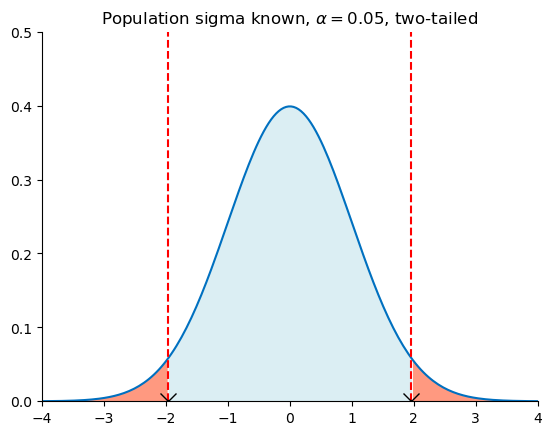

In [4]:
fig, ax = plt.subplots()
plt.plot(x, f_x, color="#0070C0")  # 绘制标准正态分布曲线

## 填充不拒绝区域
plt.fill_between(x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 f_x[np.logical_and(x >= -crit_value, x <= crit_value)],
                 color="#DBEEF3")

## 绘制临界值的垂直线和标记
ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)
ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

## 填充拒绝区域
plt.fill_between(x[x <= -crit_value], f_x[x <= -crit_value], color="#FF9980")
plt.fill_between(x[x >= crit_value], f_x[x >= crit_value], color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, two-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## 左尾检验

In [5]:
crit_value = stats.norm.ppf(q=1 - alpha)  # 计算左尾检验的临界值

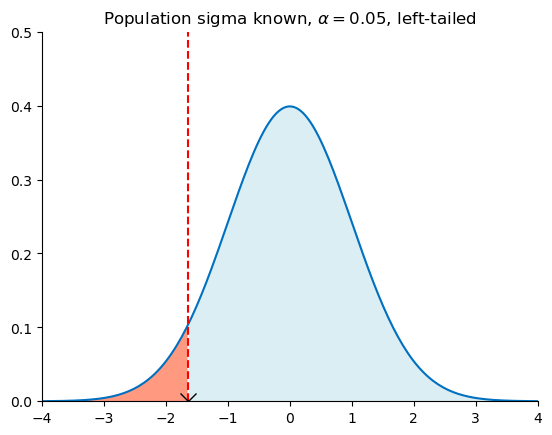

In [6]:
fig, ax = plt.subplots()
plt.plot(x, f_x, color="#0070C0")

## 填充不拒绝区域
plt.fill_between(x[x >= -crit_value],
                 f_x[x >= -crit_value],
                 color="#DBEEF3")

## 绘制临界值的垂直线和标记
ax.axvline(x=-crit_value, color='r', linestyle='--')
plt.plot(-crit_value, 0, marker='x', color='k', markersize=12)

## 填充拒绝区域
plt.fill_between(x[x <= -crit_value],
                 f_x[x <= -crit_value],
                 color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, left-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## 右尾检验

In [7]:
crit_value = stats.norm.ppf(q=1 - alpha)  # 计算右尾检验的临界值

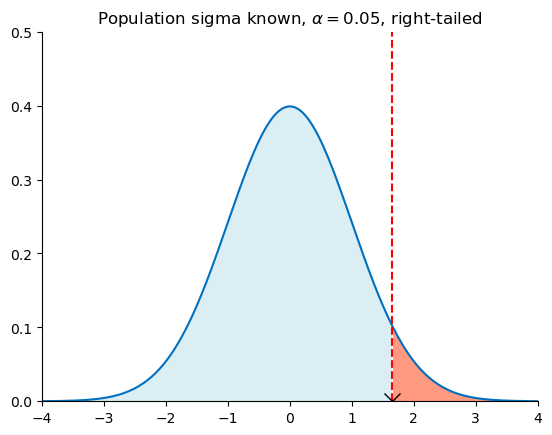

In [8]:
fig, ax = plt.subplots()
plt.plot(x, f_x, color="#0070C0")

## 填充不拒绝区域
plt.fill_between(x[x <= crit_value],
                 f_x[x <= crit_value],
                 color="#DBEEF3")

## 绘制临界值的垂直线和标记
ax.axvline(x=crit_value, color='r', linestyle='--')
plt.plot(crit_value, 0, marker='x', color='k', markersize=12)

## 填充拒绝区域
plt.fill_between(x[x >= crit_value],
                 f_x[x >= crit_value],
                 color="#FF9980")

plt.title("Population sigma known, $\\alpha = 0.05$, right-tailed")

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)